# OPENING DATASET

In [4]:
import numpy as np
import pandas as pd
import nltk
import re

nltk.download('punkt') # I ACTUALLY DONT NOW WHAT IS THIS, BUT WITHOUT THAT IT DOESN'T WORK 
nltk.download('wordnet')
nltk.download('omw-1.4')

df = pd.read_csv('root2ai - Data.csv') # READING CSV FILE AND MAKE IT AS PANDAS DATAFRAME



u=list(df['Text']) #WE ARE TAKING ONLY TEXTS, BECAUSE WE DON'T WANT CLASSIFY 

u[:5] #PRINTING 5 TEXTS FOR EXAMPLE

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/markokachaikin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/markokachaikin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/markokachaikin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['reserve bank forming expert committee based institute development research banking technology study approach distributed ledger technology help support shift',
 'director could play role financial system',
 'preliminary discuss secure transaction study research payment',
 'security indeed prove essential transforming financial system part effort move away heavy reliance cash based',
 'bank settlement normally take three days based payment verification technology take less tier security']

## CLEANING FROM STOPWORDS AND TOKENIZATION

In [8]:
nltk.download('stopwords') # THAT'S FOR IMPORTING TYPICAL ENGLISH STOPWORDS
from nltk.corpus import stopwords
R=''
for i in u:
    R+=str(i) #CREATE A STRING FROM LIST OF STRINGS
    
#HERE IS A PROBLEM THAT TEXTS HAVE ALREADY CLEANED
#BUT FOR EXAMPLE WE use typical cleaning with regex'S

R = re.sub(r'[.,!?;:()/]{,1}',repl='',string= R) # CLEANING FROM PUNCTUATION
R = re.sub(r'\s{2,}',repl='',string= R) # CLEANING FROM EXTRA SPACES 


R=R.lower() #ALL WORDS TO LOWERCASE

text_tokens=nltk.word_tokenize(R) # TOKENIZATION 


stop_words=stopwords.words("english")

text_tokens_cleaned=[i for i in text_tokens if i not in stop_words] # TOKENS FROM TEXTS WITHOUT STOPWORDS

unique_text_tokens_cleaned = list(set(text_tokens_cleaned)) # UNIQUE TOKENS FROM TEXT WITHOUT STOPWORDS

text_tokens_cleaned[:20] #FOR EXAMPLE PRINTING FIRST 20 TOKENS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markokachaikin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['reserve',
 'bank',
 'forming',
 'expert',
 'committee',
 'based',
 'institute',
 'development',
 'research',
 'banking',
 'technology',
 'study',
 'approach',
 'distributed',
 'ledger',
 'technology',
 'help',
 'support',
 'shiftdirector',
 'could']

# STEMMING


In [9]:
from nltk.stem import PorterStemmer #Typical tool for stemming
porter=nltk.PorterStemmer() 

text_tokens_cleaned_stemized= [ porter.stem(i) for i in text_tokens_cleaned] 

unique_text_tokens_cleaned_stemized = [ porter.stem(i) for i in unique_text_tokens_cleaned ]

text_tokens_cleaned_stemized[:20] #FIRST 20 STEMS FROM TEXTS

['reserv',
 'bank',
 'form',
 'expert',
 'committe',
 'base',
 'institut',
 'develop',
 'research',
 'bank',
 'technolog',
 'studi',
 'approach',
 'distribut',
 'ledger',
 'technolog',
 'help',
 'support',
 'shiftdirector',
 'could']

# LEMMATIZATION

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = nltk.WordNetLemmatizer()

text_tokens_cleaned_lemmatized = [ lemmatizer.lemmatize(t) for t in text_tokens_cleaned]

unique_text_tokens_cleaned_lemmatized = [ lemmatizer.lemmatize(t) for t in unique_text_tokens_cleaned]

text_tokens_cleaned_lemmatized [:20]#FIRST 20 LEMMS

                                         

['reserve',
 'bank',
 'forming',
 'expert',
 'committee',
 'based',
 'institute',
 'development',
 'research',
 'banking',
 'technology',
 'study',
 'approach',
 'distributed',
 'ledger',
 'technology',
 'help',
 'support',
 'shiftdirector',
 'could']

# WordCloud


# words

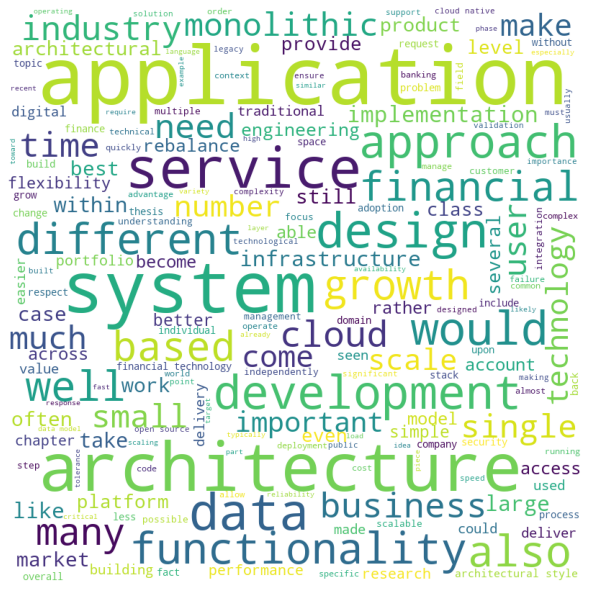

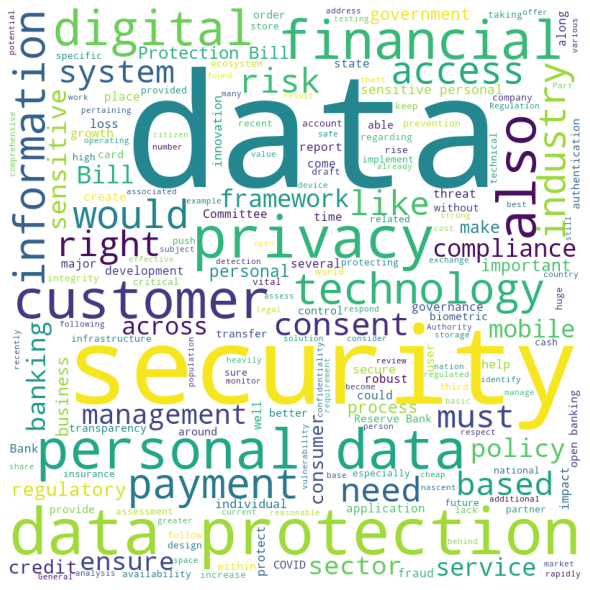

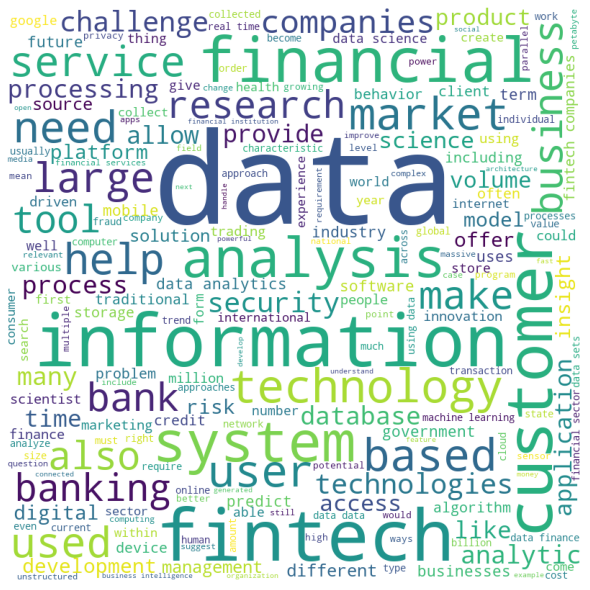

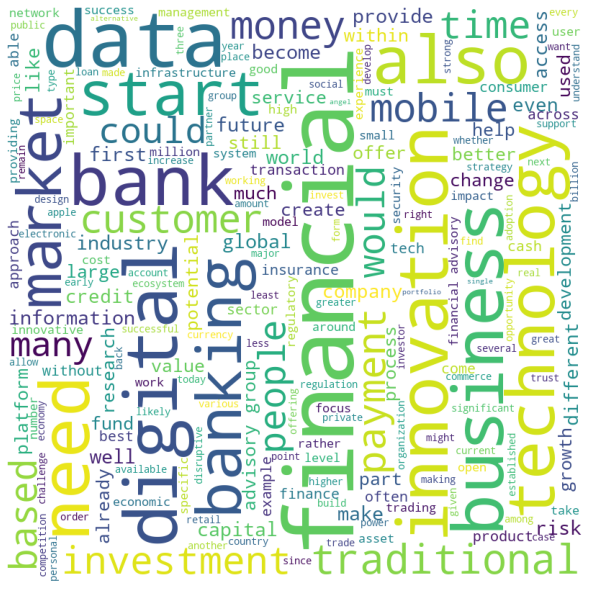

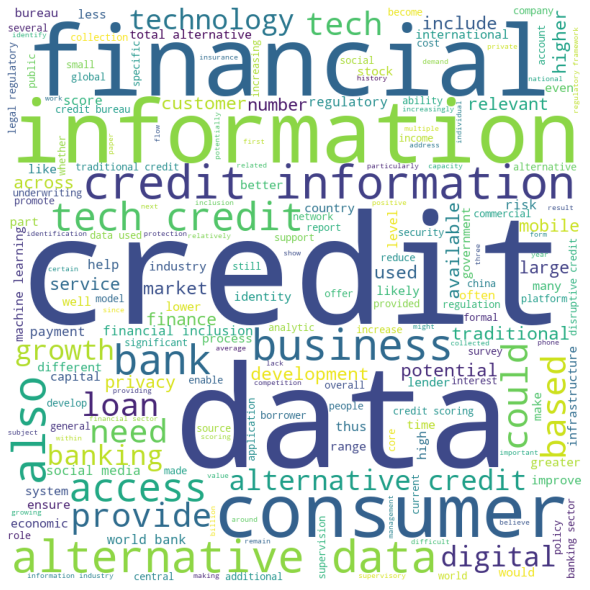

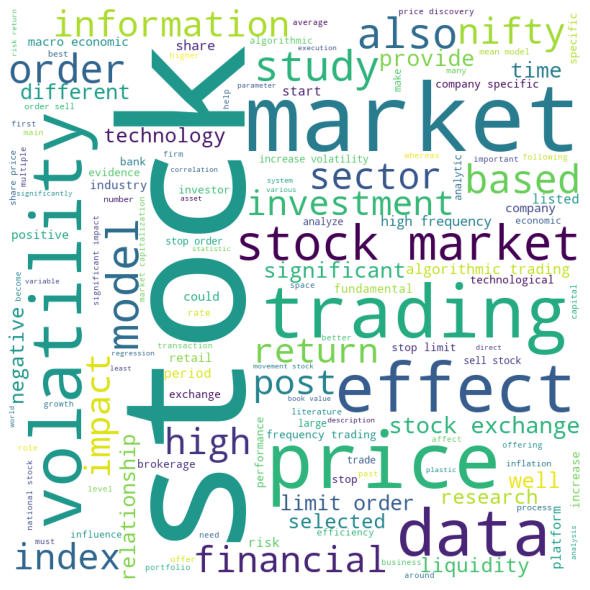

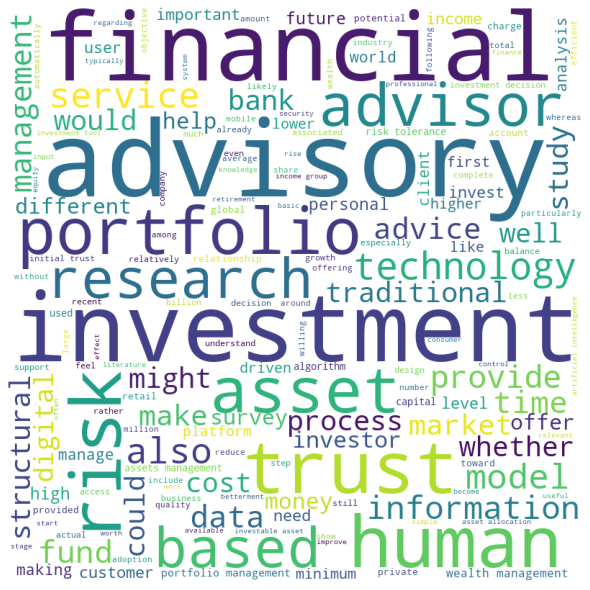

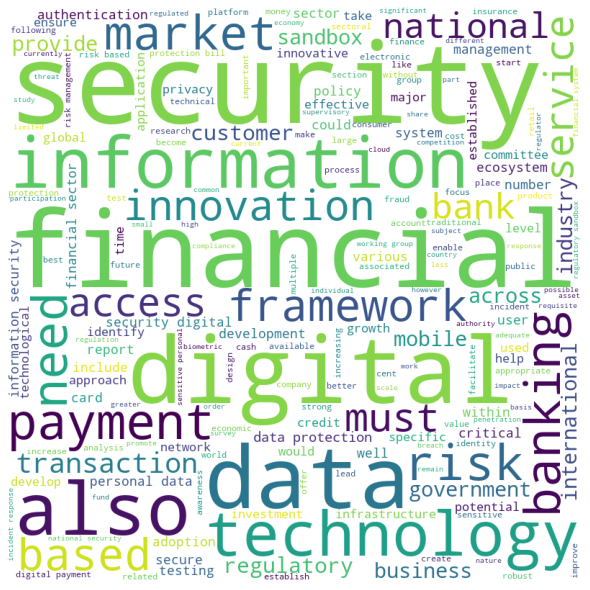

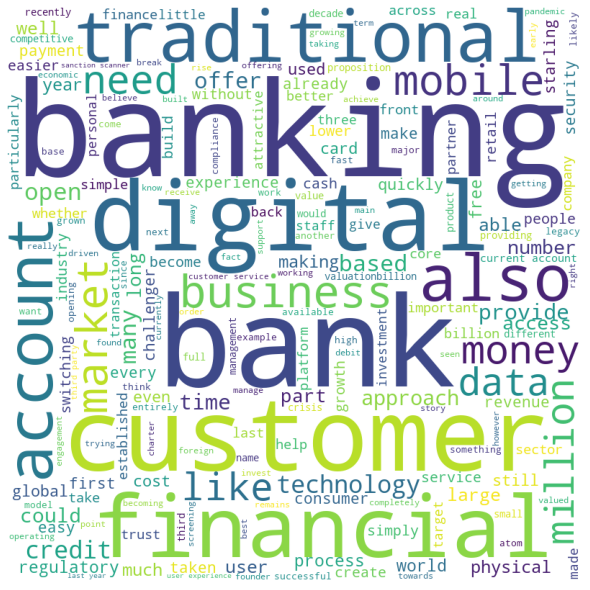

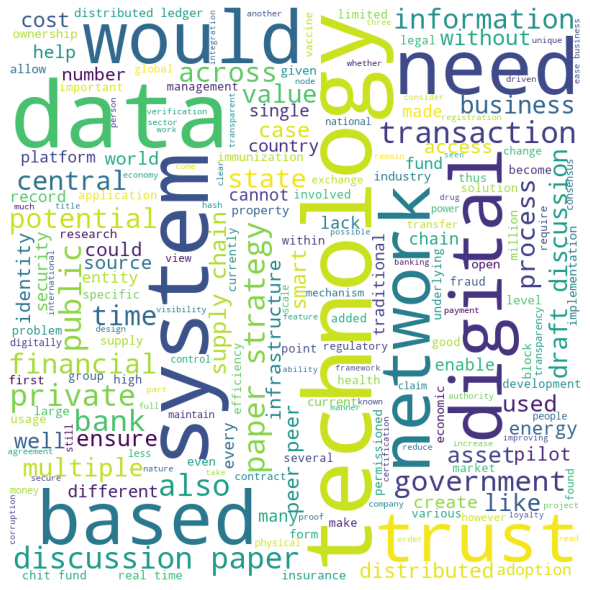

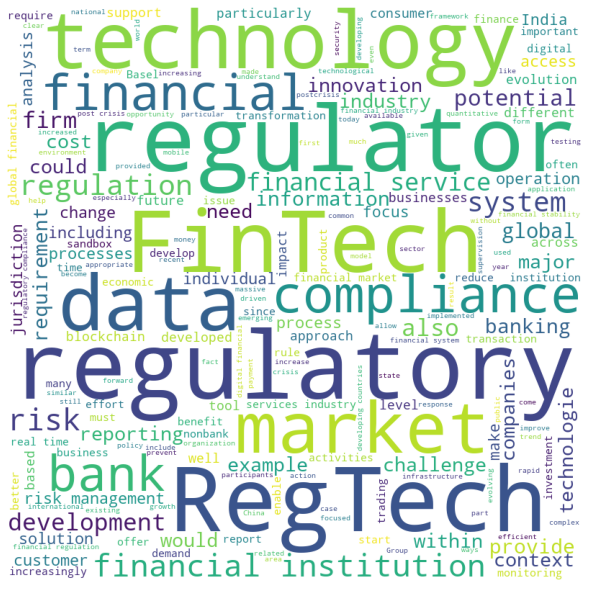

In [26]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def cloud_for_label(label):
    u = list(df['Text'])
    v = list(df['Target'])
    if len(u) == len(v):
        A=[[u[i],v[i]] for i in range(len(u))]
    text_w_label=''
    for i in A:
        if i[1] == label:
            text_w_label+=str(i[0])
            
    text_w_label = re.sub(r'[.,!?;:()/]{,1}',repl='',string= text_w_label)
    text_w_label = re.sub(r'\s{2,}',repl='',string= text_w_label)
    text_w_label.lower()
    wordcld=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text_w_label)
    plt.figure( figsize = (8, 8),facecolor = None)
    plt.imshow(wordcld)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()
    
for i in list(set(list(df['Target']))):
    cloud_for_label(i)

# Bigrams


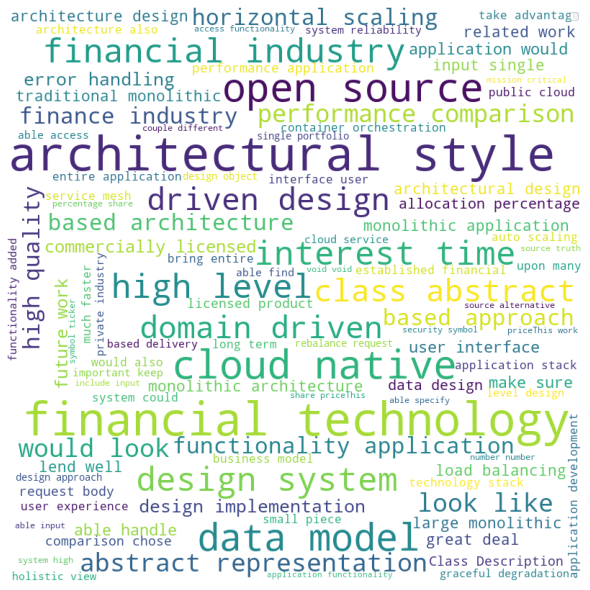

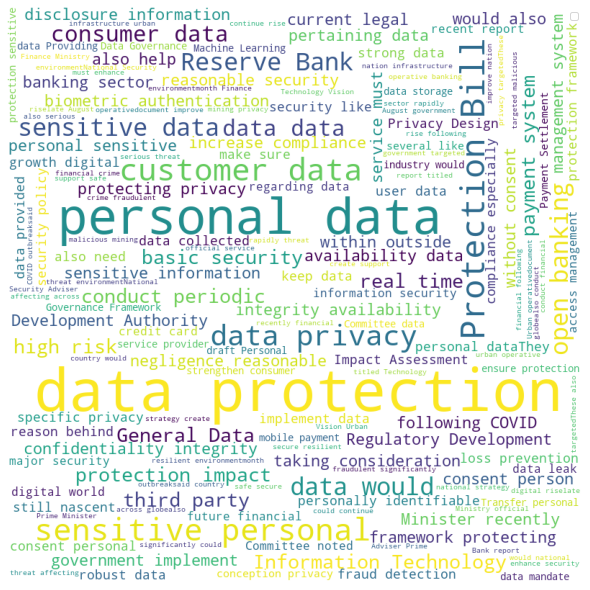

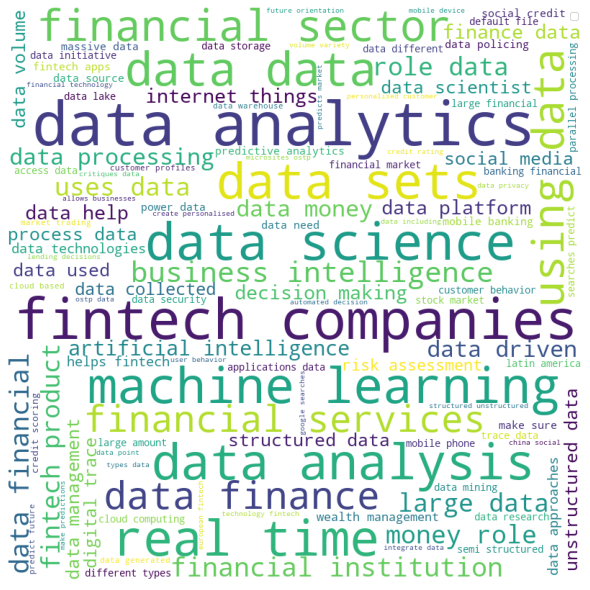

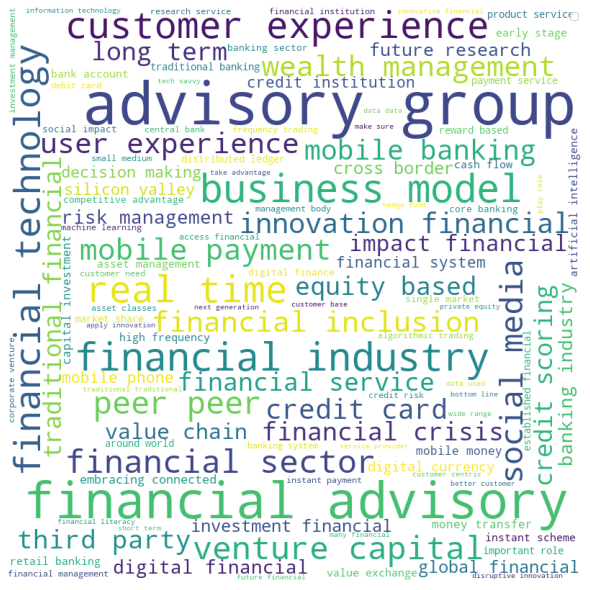

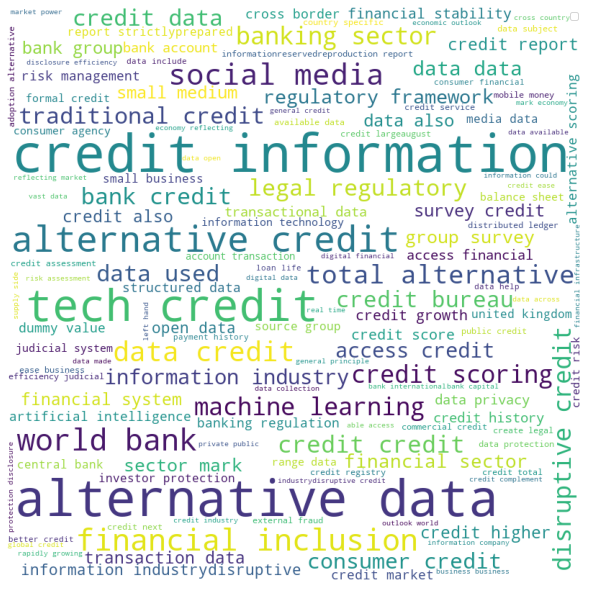

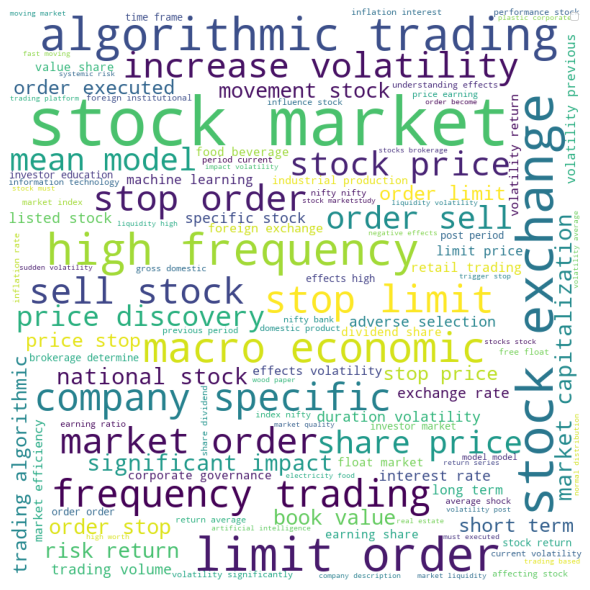

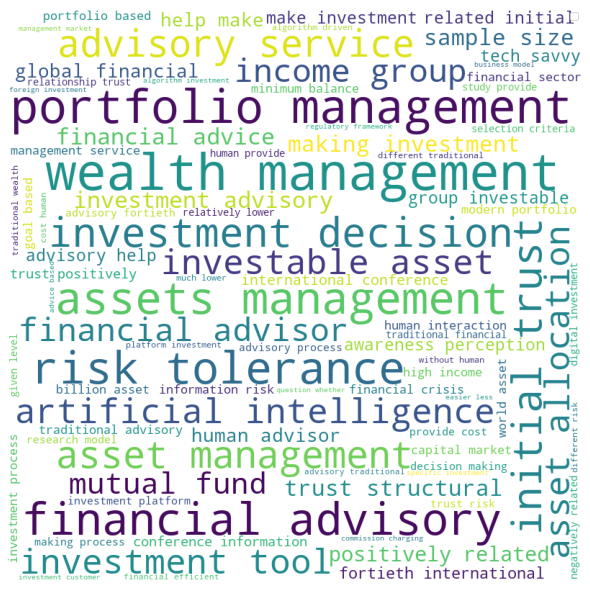

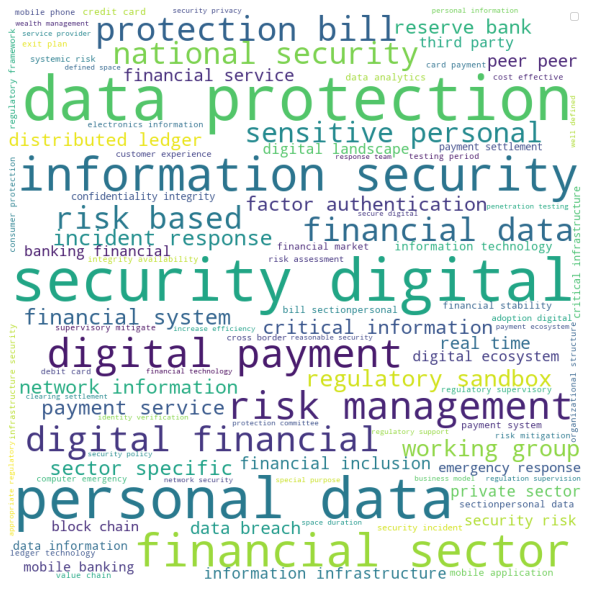

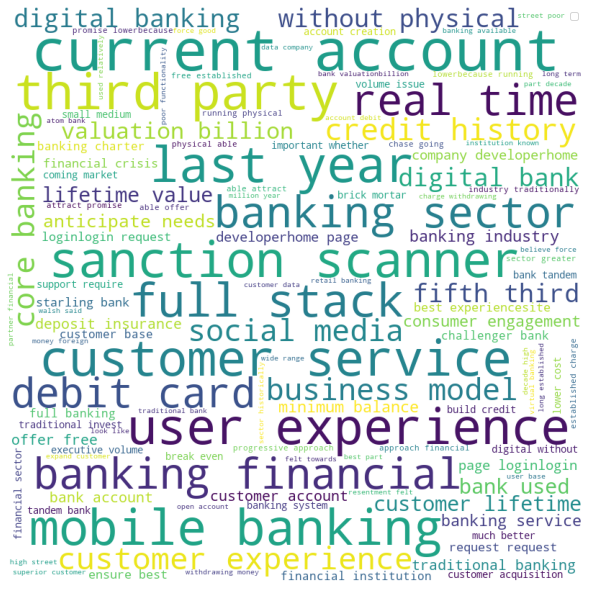

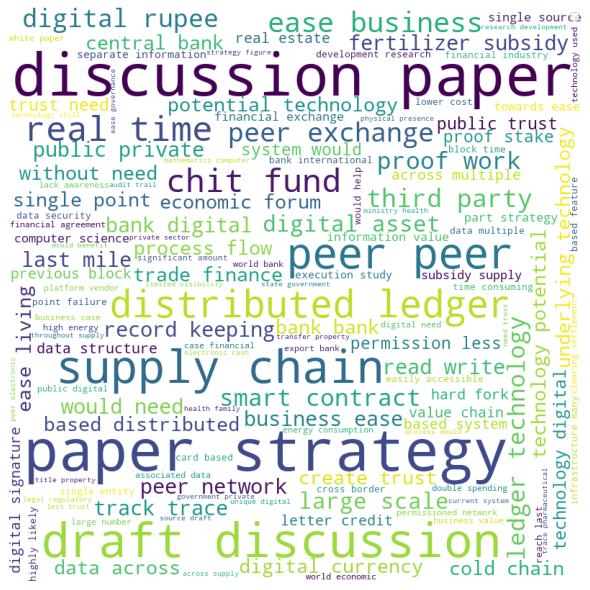

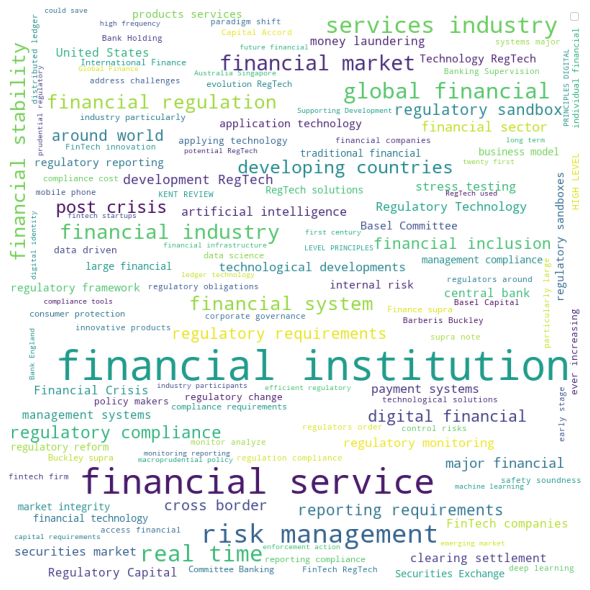

In [28]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def cloud_for_label_bigrams(label):
    u = list(df['Text'])
    v = list(df['Target'])
    if len(u) == len(v):
        A=[[u[i],v[i]] for i in range(len(u))]
    text_w_label=''
    for i in A:
        if i[1] == label:
            text_w_label+=str(i[0])
            
    text_w_label = re.sub(r'[.,!?;:()/]{,1}',repl='',string= text_w_label)
    text_w_label = re.sub(r'\s{2,}',repl='',string= text_w_label)
    text_w_label.lower()
    wordcld=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10,collocation_threshold = 3).generate(text_w_label)
    plt.figure( figsize = (8, 8),facecolor = None)
    plt.imshow(wordcld)
    plt.axis("off")
    
    plt.tight_layout(pad = 0)
 
    plt.show()
    
for i in list(set(list(df['Target']))):
    cloud_for_label_bigrams(i)